# 线性回归

- 是对 n 维输入的加权外加偏差
- 使用平方损失
- 有显式解
- 可以看成单层神经网络

## 代码实现

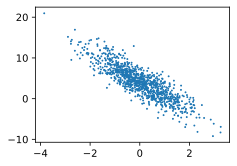

In [164]:
import random
import torch
from d2l import torch as d2l

# 构造人造数据集
def synthetic_data(w, b, num_examples):
    '''生成 y = Xw + b + 噪声'''
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape(-1, 1)

true_w = torch.tensor([2, -3.4])
true_b = 4.2
featrues, labels = synthetic_data(true_w, true_b, 1000)

d2l.set_figsize()
d2l.plt.scatter(featrues[:,(1)].detach().numpy(),
                labels.detach().numpy(), 1)

In [165]:
def data_iter(batch_size, features, labels):
    num_examples = len(featrues)
    indices = list(range(num_examples))

    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_incices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
        yield featrues[batch_incices], labels[batch_incices]

batch_size = 10

for X, y in data_iter(batch_size, featrues, labels):
    print(X, '\n', y)
    break

tensor([[ 1.8034,  1.6589],
        [-0.9100, -0.0323],
        [ 0.1135, -0.7992],
        [ 0.6267,  1.3120],
        [-0.3124, -0.6621],
        [ 1.4151, -0.8626],
        [-0.6038, -0.6084],
        [ 0.4749,  0.0898],
        [-0.9414,  0.4655],
        [ 0.6630, -2.4451]]) 
 tensor([[ 2.1558],
        [ 2.4964],
        [ 7.1522],
        [ 0.9973],
        [ 5.8265],
        [ 9.9570],
        [ 5.0773],
        [ 4.8436],
        [ 0.7333],
        [13.8583]])


初始化模型的参数

In [166]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

定义模型

In [167]:
def linreg(X, w, b):
    '''线性模型'''
    return torch.matmul(X, w) + b

定义损失函数

In [168]:
def squared_loss(y_hat: torch.Tensor, y: torch.Tensor):
    '''均方损失'''
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

定义优化算法

In [169]:
def sgd(params, lr, batch_size):
    '''小批量随机梯度下降'''
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

训练过程

In [170]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for eqoch in range(num_epochs):
    for X, y in data_iter(batch_size, featrues, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(featrues, w, b), labels)
        print(f'eqoch {eqoch + 1}, loss {float(train_l.mean()):f}')

eqoch 1, loss 0.039527
eqoch 2, loss 0.000147
eqoch 3, loss 0.000052


In [171]:
print(f'w的估计误差: {true_w  - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b  - b}')

w的估计误差: tensor([ 0.0003, -0.0012], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0003], grad_fn=<RsubBackward1>)
